In [76]:
# Import necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [89]:
from pydataset import data

In [112]:
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
5,InsectSprays,Effectiveness of Insect Sprays
6,JohnsonJohnson,Quarterly Earnings per Johnson & Johnson Share
7,LakeHuron,Level of Lake Huron 1875-1972
8,LifeCycleSavings,Intercountry Life-Cycle Savings Data
9,Nile,Flow of the River Nile


In [176]:
df = data('iris')

In [177]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [180]:
# Defining data (df), target (y), features (X)
X = df.drop('Species', axis=1)
y = df.Species
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

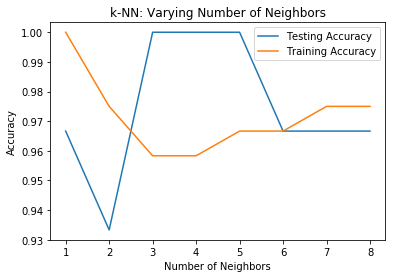

In [181]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [188]:
    ## Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

    ## Fit the classifier to the training data
knn.fit(X_train, y_train)

    ## Print the accuracy
print(knn.score(X_test, y_test))
y_pred = knn.predict(X_test)

0.9833333333333333


In [189]:
# Import necessary modules
from sklearn.metrics import classification_report, confusion_matrix

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        23
 versicolor       0.95      1.00      0.97        19
  virginica       1.00      0.94      0.97        18

avg / total       0.98      0.98      0.98        60



In [ ]:
##LOGISTIC REGRESSION

In [208]:
df.Species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: Species, dtype: int64

In [222]:
a = df.Species
b = []
for row in a:
    if row == 'setosa':
        b.append(1)
    else:
        b.append(0)
df['spec'] = b

In [223]:
# Defining data (df), target (y), features (X)
X = df.drop(['spec', 'Species'], axis=1)
y = df.spec
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [224]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred1 = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[20  0]
 [ 0 10]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        20
          1       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        30



In [240]:
y.shape()

AttributeError: 'list' object has no attribute 'shape'

In [237]:
###ROC CURVE
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ValueError: bad input shape (30, 2)